In [ ]:
import pandas as pd
df = pd.read_csv('/content/application_train.csv')

In [ ]:
import pandas as pd

# Load the uploaded CSV directly from /content/
df = pd.read_csv('/content/application_train.csv')

# Quick check
print("Shape:", df.shape)
df.head()

Shape: (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#checking missing values (% missing per column)
# % of missing values per column
missing = df.isnull().mean().sort_values(ascending=False) * 100
missing = missing[missing > 0]

missing.head(20)  # Top 20 columns with missing values


,0
COMMONAREA_AVG,69.872297
COMMONAREA_MODE,69.872297
COMMONAREA_MEDI,69.872297
NONLIVINGAPARTMENTS_MEDI,69.432963
NONLIVINGAPARTMENTS_MODE,69.432963
NONLIVINGAPARTMENTS_AVG,69.432963
FONDKAPREMONT_MODE,68.386172
LIVINGAPARTMENTS_AVG,68.354953
LIVINGAPARTMENTS_MEDI,68.354953
LIVINGAPARTMENTS_MODE,68.354953


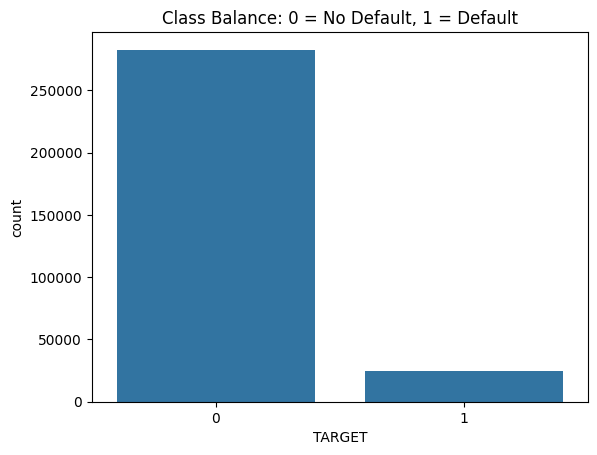

In [ ]:
#Check Class Balance (TARGET column: 1 = Defaulted loan)
# Count of each class
df['TARGET'].value_counts()

# Visualize the balance
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='TARGET', data=df)
plt.title("Class Balance: 0 = No Default, 1 = Default")
plt.show()

In [ ]:
# Separate numeric and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

print(f"Number of numerical features: {len(numerical_cols)}")
print(f"Number of categorical features: {len(categorical_cols)}")

Number of numerical features: 106
Number of categorical features: 16


In [ ]:
# Statistical summary of numerical features
df[numerical_cols].describe().T.head(15)  # Only showing top 15 for clarity

,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.00000,189145.500000,278202.00000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.00000,0.000000,0.00000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.00000,0.000000,0.00000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.00000,112500.000000,147150.00000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.00000,270000.000000,513531.00000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1615.50000,16524.000000,24903.00000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,40500.00000,238500.000000,450000.00000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,0.00029,0.010006,0.01885,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-25229.00000,-19682.000000,-15750.00000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-17912.00000,-2760.000000,-1213.00000,-289.000000,3.652430e+05


In [ ]:
# View unique values for some categorical columns
for col in categorical_cols[:10]:  # Just first 10 for now
    print(f"{col}: {df[col].nunique()} unique values")
    print(df[col].value_counts(dropna=False).head())
    print()

NAME_CONTRACT_TYPE: 2 unique values
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64

CODE_GENDER: 3 unique values
CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

FLAG_OWN_CAR: 2 unique values
FLAG_OWN_CAR
N    202924
Y    104587
Name: count, dtype: int64

FLAG_OWN_REALTY: 2 unique values
FLAG_OWN_REALTY
Y    213312
N     94199
Name: count, dtype: int64

NAME_TYPE_SUITE: 7 unique values
NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Name: count, dtype: int64

NAME_INCOME_TYPE: 8 unique values
NAME_INCOME_TYPE
Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Name: count, dtype: int64

NAME_EDUCATION_TYPE: 5 unique values
NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education          

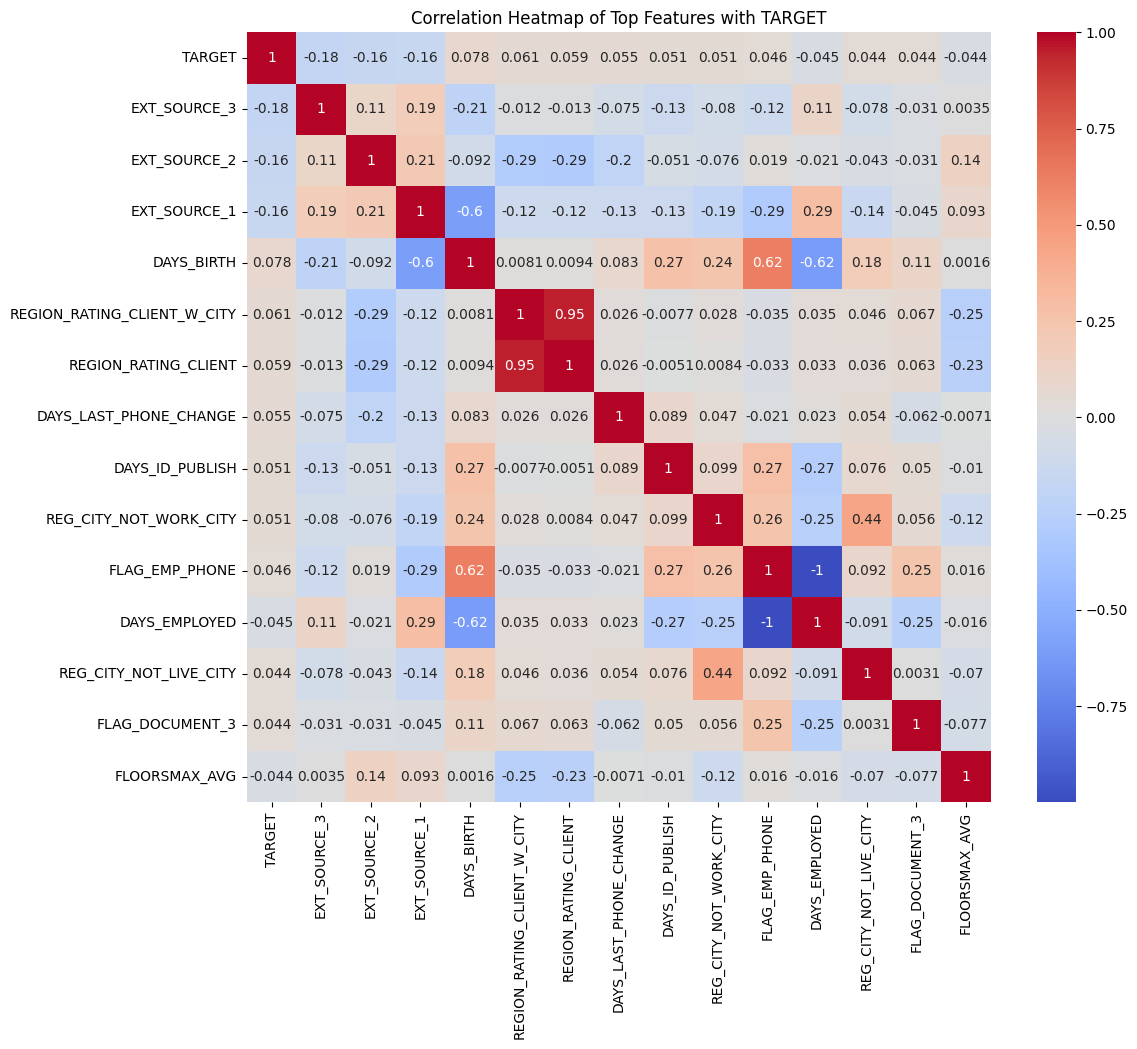

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix for numeric columns
corr_matrix = df[numerical_cols].corr()

# Plot heatmap for top correlations with TARGET
plt.figure(figsize=(12, 10))
top_corr = corr_matrix['TARGET'].abs().sort_values(ascending=False).head(15)
sns.heatmap(df[top_corr.index].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Top Features with TARGET")
plt.show()

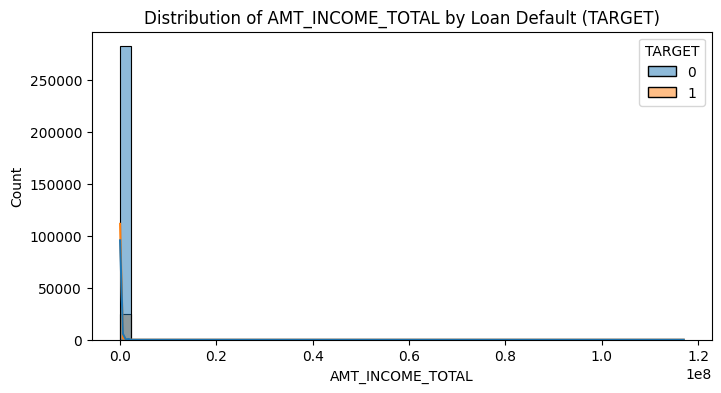

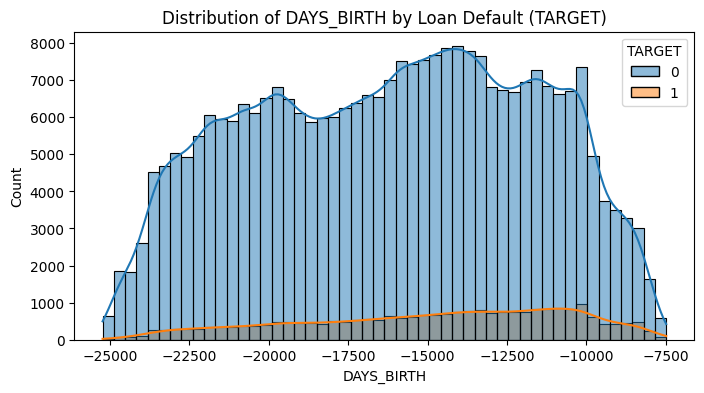

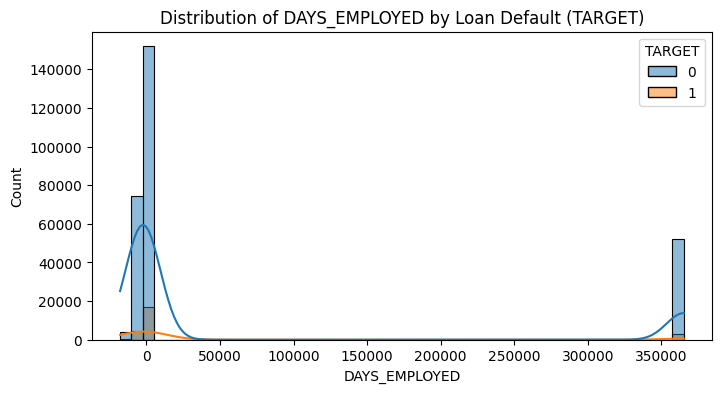

In [ ]:
import seaborn as sns

# Plot distribution of some important features by TARGET
important_feats = ['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED']

for feat in important_feats:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=feat, hue='TARGET', bins=50, kde=True)
    plt.title(f"Distribution of {feat} by Loan Default (TARGET)")
    plt.show()

In [ ]:
missing = df.isnull().sum() / len(df) * 100
missing = missing[missing > 0].sort_values(ascending=False)
missing.head(15)

,0
COMMONAREA_MEDI,69.872297
COMMONAREA_MODE,69.872297
COMMONAREA_AVG,69.872297
NONLIVINGAPARTMENTS_MODE,69.432963
NONLIVINGAPARTMENTS_MEDI,69.432963
NONLIVINGAPARTMENTS_AVG,69.432963
FONDKAPREMONT_MODE,68.386172
LIVINGAPARTMENTS_AVG,68.354953
LIVINGAPARTMENTS_MEDI,68.354953
LIVINGAPARTMENTS_MODE,68.354953


In [ ]:
high_missing_cols = missing[missing > 40].index
df = df.drop(columns=high_missing_cols)

In [ ]:
# Fill numeric columns with median
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].median())

# Fill categorical columns with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [ ]:
# Label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Select only numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.drop('TARGET')

# Fit and transform the numeric features
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [ ]:
# Step 1: Separate target BEFORE doing anything
y = df['TARGET']
X = df.drop('TARGET', axis=1)

In [ ]:
# Step 2: Scale only numeric features in X (not y)
from sklearn.preprocessing import StandardScaler

numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])


In [ ]:
#Step 3: Train-test split (y still untouched)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Step 4: Ensure target values are integers (0 or 1)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [ ]:
# Step 5: Train logistic regression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions on test set
y_pred = model.predict(X_test)

# Accuracy: % of correct predictions
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

# Confusion Matrix: how many true positives, false positives, etc.
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification report: precision, recall, F1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9194
Confusion Matrix:
[[56498    56]
 [ 4903    46]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.45      0.01      0.02      4949

    accuracy                           0.92     61503
   macro avg       0.69      0.50      0.49     61503
weighted avg       0.88      0.92      0.88     61503



In [ ]:
# Logistic Regression with class weight adjustment
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# Predict again
y_pred = model.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.6851
Confusion Matrix:
[[38811 17743]
 [ 1623  3326]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     56554
           1       0.16      0.67      0.26      4949

    accuracy                           0.69     61503
   macro avg       0.56      0.68      0.53     61503
weighted avg       0.90      0.69      0.76     61503



In [ ]:
!pip install lightgbm

In [ ]:
from sklearn.model_selection import train_test_split

# Assume df is your cleaned DataFrame and 'TARGET' is your label
X = df.drop('TARGET', axis=1)
y = df['TARGET']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
import numpy as np
unique, counts = np.unique(y_train_smote, return_counts=True)
print("Class distribution after SMOTE:")
print(dict(zip(unique, counts)))

Class distribution after SMOTE:
{np.int64(0): np.int64(226148), np.int64(1): np.int64(226148)}


In [35]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Create the model
lgbm = LGBMClassifier(
    n_estimators=100,
    learning_rate=0.05,
    class_weight='balanced',  # Further helps with imbalance
    random_state=42
)

# Train the model
lgbm.fit(X_train_smote, y_train_smote)

# Predict on the test set (NOT SMOTED)
y_pred = lgbm.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

[LightGBM] [Info] Number of positive: 226148, number of negative: 226148
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.374560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12273
[LightGBM] [Info] Number of data points in the train set: 452296, number of used features: 69
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Accuracy: 0.9191421556672033
Confusion Matrix:
 [[56508    30]
 [ 4943    22]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96     56538
           1       0.42      0.00      0.01      4965

    accuracy                           0.92     61503
   macro avg       0.67      0.50      0.48     61503
weighted avg       0.88      0.92      0.88     61503



In [36]:
from xgboost import XGBClassifier

xgb = XGBClassifier(scale_pos_weight=10, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_smote, y_train_smote)
y_pred_xgb = xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


Accuracy: 0.7184039802936442
Confusion Matrix:
 [[41190 15348]
 [ 1971  2994]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.73      0.83     56538
           1       0.16      0.60      0.26      4965

    accuracy                           0.72     61503
   macro avg       0.56      0.67      0.54     61503
weighted avg       0.89      0.72      0.78     61503



In [40]:
original_df = pd.read_csv('/content/application_train.csv')



In [41]:
# Add the original gender values to your test DataFrame
df_test_results['CODE_GENDER'] = original_df.loc[X_test.index, 'CODE_GENDER']


In [42]:
grouped = df_test_results.groupby('CODE_GENDER')

for gender, group in grouped:
    total = len(group)
    actual_defaults = group['actual'].sum()
    predicted_defaults = group['predicted'].sum()
    print(f"\nGender: {gender}")
    print(f"Total samples: {total}")
    print(f"Actual defaulters: {actual_defaults} ({actual_defaults / total:.2%})")
    print(f"Predicted defaulters: {predicted_defaults} ({predicted_defaults / total:.2%})")



Gender: F
Total samples: 40561
Actual defaulters: 2836 (6.99%)
Predicted defaulters: 10089 (24.87%)

Gender: M
Total samples: 20940
Actual defaulters: 2129 (10.17%)
Predicted defaulters: 8252 (39.41%)

Gender: XNA
Total samples: 2
Actual defaulters: 0 (0.00%)
Predicted defaulters: 1 (50.00%)
